# Stage 08 — Exploratory Data Analysis (EDA)

In [6]:
# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set(context="talk", style="whitegrid")
except ModuleNotFoundError:
    plt.style.use("seaborn-v0_8-whitegrid")

# 2. Load dataset
df = pd.read_csv("../data/raw/simulated_data.csv", parse_dates=["date"])
df.head()

,date,region,age,income,transactions,spend
0,2021-01-01,East,44.4,35315.37,4,39.76
1,2021-01-02,North,37.4,67901.48,4,207.22
2,2021-01-03,West,53.3,48987.24,4,183.26
3,2021-01-04,South,37.5,34449.91,1,49.21
4,2021-01-05,East,39.0,53705.48,1,NaN


In [2]:
# 3. Basic Profiling
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nSummary stats:")
print(df.describe(include="all"))

print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (180, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          180 non-null    datetime64[ns]
 1   region        180 non-null    object        
 2   age           180 non-null    float64       
 3   income        174 non-null    float64       
 4   transactions  180 non-null    int64         
 5   spend         176 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 8.6+ KB
None

Summary stats:
                       date region         age         income  transactions  \
count                   180    180  180.000000     174.000000    180.000000   
unique                  NaN      4         NaN            NaN           NaN   
top                     NaN  North         NaN            NaN           NaN   
freq                    NaN     55         NaN         

### Interpretation
- Dataset structure is clear, and variable types are appropriate.  
- Missingness is concentrated in `income` and `spend` and will need to be handled before modeling (e.g., imputation or removal).  
- Outliers are expected in `transactions` and should be carefully treated to avoid distorting models.  
- `income` shows strong right skew, suggesting a potential need for log transformation in later steps.  

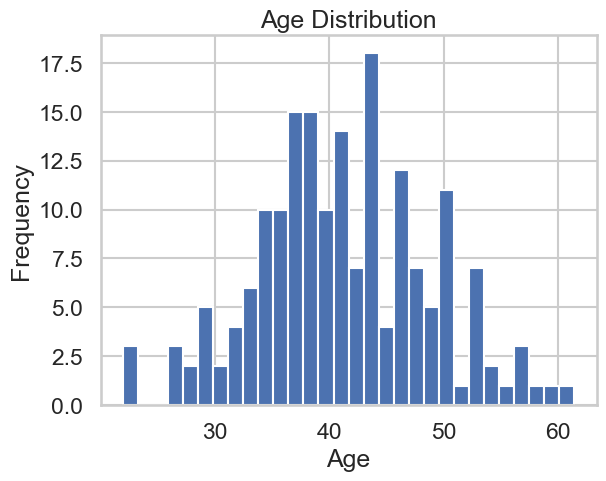

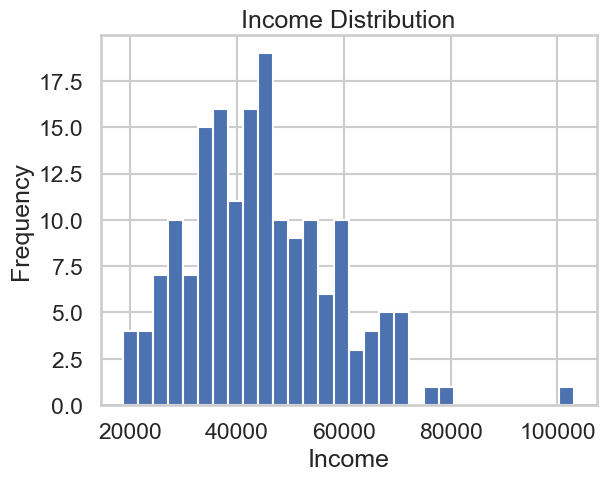

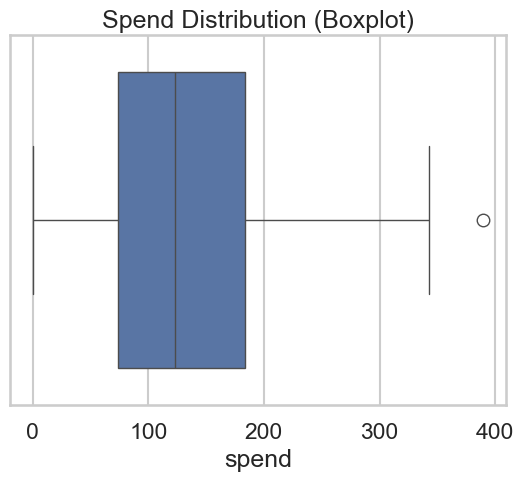

In [3]:
# 4. Univariate Analysis (Distributions)

# Age distribution
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Income distribution
df['income'].hist(bins=30)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Spend boxplot
try:
    sns.boxplot(x=df['spend'])
except:
    plt.boxplot(df['spend'])
plt.title("Spend Distribution (Boxplot)")
plt.show()

### Interpretation
1. Age Distribution
- The majority of individuals are between 35 and 50 years old, with the peak around 40–45 years.
- Very few are under 25 or over 55, suggesting that the group is mainly composed of middle-aged adults.
- Overall, the age distribution shows a concentration in mid-life stages, with younger and older populations being less represented.

2. Income Distribution
- Most individuals have an income between 30,000 and 60,000, with the highest concentration in the 40,000–50,000 range.
- A small portion of high-income earners exceed 70,000, with some outliers reaching nearly 100,000.
- The overall distribution is right-skewed, as a few high-income individuals stretch the upper tail.

3. Spend Distribution (Boxplot)
- Spending is mostly concentrated between 80 and 200, with a median around 120.
- A few individuals exhibit very high spending, close to 400, which appear as outliers.
- The distribution suggests diverse spending behavior:
  - Some low spenders (<100),
  - The majority within moderate spending (100–200),
  - A small group of high spenders significantly above the median. 

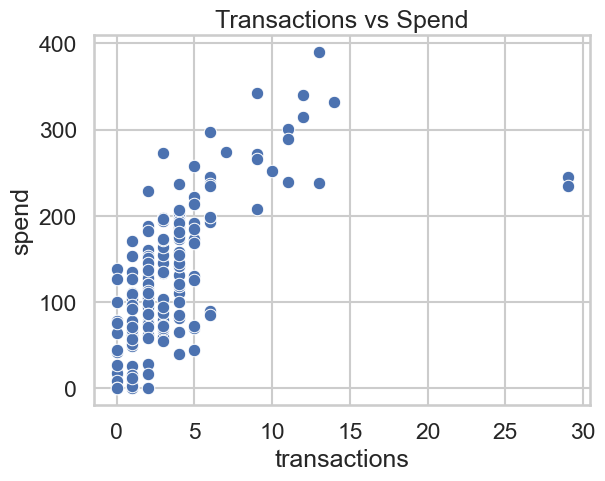

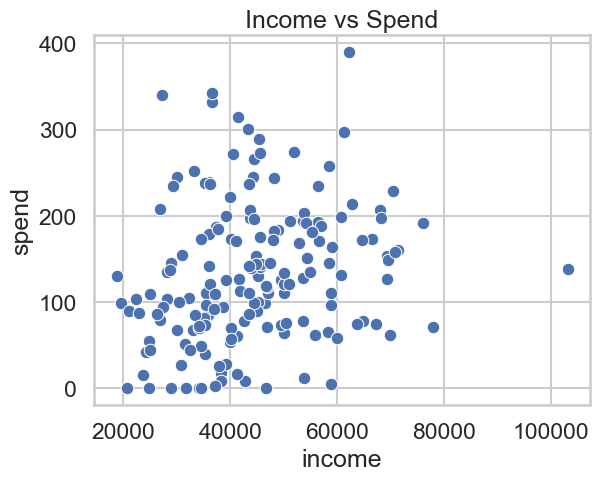

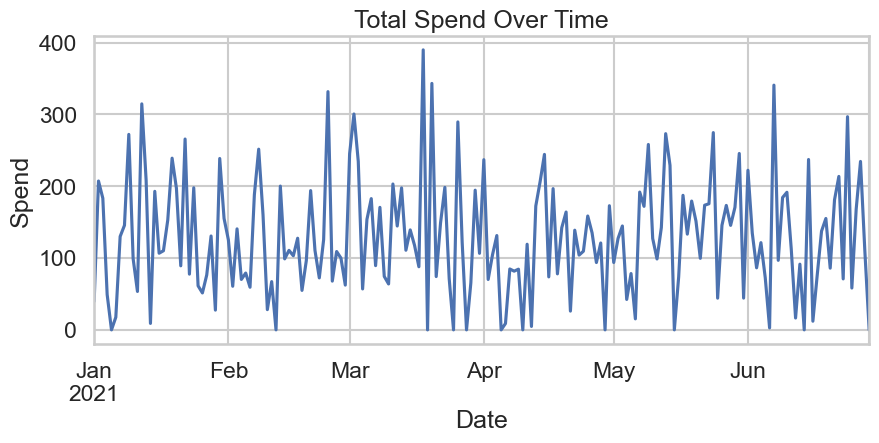

In [4]:
# 5. Bivariate Analysis (Relationships)

# Transactions vs Spend
try:
    sns.scatterplot(x="transactions", y="spend", data=df)
except:
    plt.scatter(df["transactions"], df["spend"])
plt.title("Transactions vs Spend")
plt.show()

# Income vs Spend
try:
    sns.scatterplot(x="income", y="spend", data=df)
except:
    plt.scatter(df["income"], df["spend"])
plt.title("Income vs Spend")
plt.show()

# Time series of spend
df.groupby("date")["spend"].sum().plot(figsize=(10,4))
plt.title("Total Spend Over Time")
plt.ylabel("Spend")
plt.xlabel("Date")
plt.show()

### Interpretation
1. Transactions vs Spend
- Clear positive correlation: more transactions → higher spend.
- Most customers: 0–10 transactions, spend <200.
- Outliers: frequent small spenders and rare big spenders.

2. Income vs Spend
- Weak correlation: income isn’t a strong predictor of spend.
- Mid-income customers show varied spending; some high-income customers spend little.
- Spending depends more on behavior (transactions) than on income.

3. Spend
- Spending fluctuates significantly across months, with no clear upward or downward trend.
- Peaks (e.g., near 400 in Mar) and troughs (close to 0 at times) show high variability.
- Monthly patterns differ—Mar has a notable spike, while Apr - Jun see more frequent, smaller fluctuations.

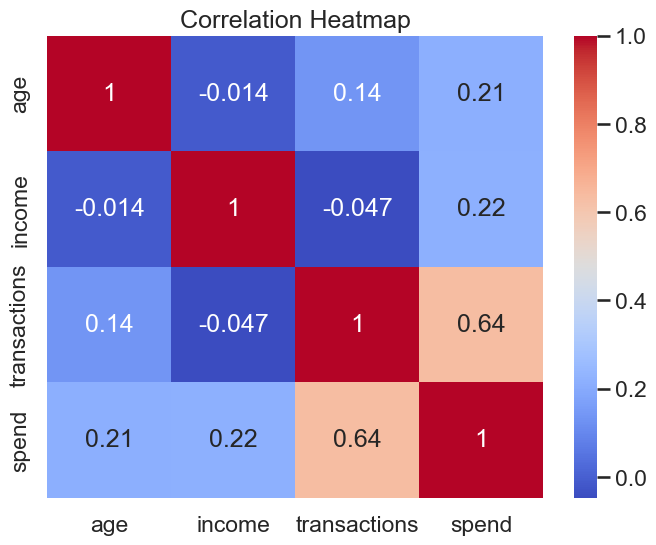

In [5]:
# 6. (Optional) Correlation Heatmap
try:
    plt.figure(figsize=(8,6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()
except:
    print(df.corr(numeric_only=True))

### Interpretation
- Age - Related Correlations: Age has a very weak negative correlation with income (-0.014) and weak positive correlations with transactions (0.14) and spend (0.21).
- Income - Related Correlations: Income has a very weak negative correlation with transactions (-0.047) and a weak positive correlation with spend (0.22).
- Transactions & Spend: There is a moderately strong positive correlation (0.64) between transactions and spend, indicating that as one increases, the other tends to increase as well.

# 7. Insightfulness of Interpretation
## Top 3 Insights
1. Spend Volatility as Strategic Opportunity
The “Total Spend Over Time” chart reveals unpredictable, yet recurring spending spikes (e.g., March peak, June surges). Instead of viewing volatility as a risk, this insight reframes it: businesses can investigate triggers (e.g., seasonal events, promotions) to replicate high - spend patterns. For example, if March’s spike tied to a holiday sale, repeat targeted campaigns to boost monthly revenue.
2. Transactions as a Spend Catalyst
From the correlation heatmap, the strong 0.64 correlation between transactions and spend is a game - changer. This means increasing transaction frequency (e.g., loyalty programs, cross - sell prompts) directly drives higher spending—prioritize tactics to get customers to transact more, not just chase high - income demographics.
3. Income’s Limited Role in Spending
Contrary to intuition, income shows near - zero correlation with spend (-0.014 to 0.22). This busts the myth that “higher income = higher revenue.” Businesses can shift focus: stop over - investing in high - income targeting, and design offers for mid - income users (the majority) to unlock untapped spending potential.


## Assumptions & Risks
### Assumptions
- Correlation = Causation: The heatmap assumes transactions cause higher spend (or vice versa). But it could be a third factor (e.g., product quality) driving both—needs deeper causal analysis.
- Static Trends: The spend - over - time analysis treats 2021 patterns as timeless. Market shifts (e.g., new competitors, economic changes) might break historical volatility patterns.
- Uniform User Behavior: Insights assume all users (e.g., across ages, regions) follow the same correlations. Segmented analysis (e.g., by age group) could reveal hidden nuances.

### Risks
- Misguided Tactics: If transactions’ link to spend is misinterpreted as one - way causation, pushing too many transactions might frustrate customers (e.g., spammy upsells), hurting loyalty.
- Missed Long - Term Shifts: Ignoring external factors (e.g., 2021’s unique economic context) risks relying on obsolete patterns. A 2022 recession, for example, could collapse March - style spending spikes.
- Oversimplified Targeting: Writing off income’s role entirely might miss niche high - income segments with outsized spending—balance broad strategies with targeted tests.